Training accuracy: 1.0
Testing accuracy: 1.0


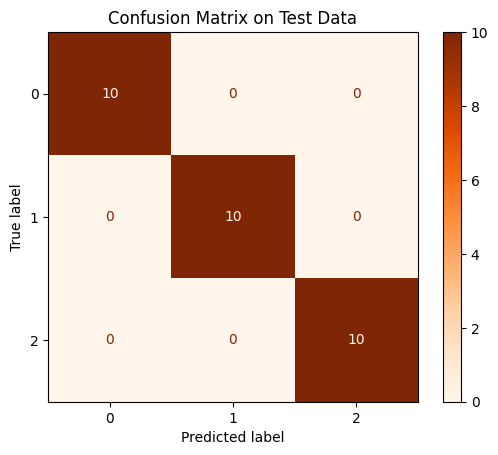

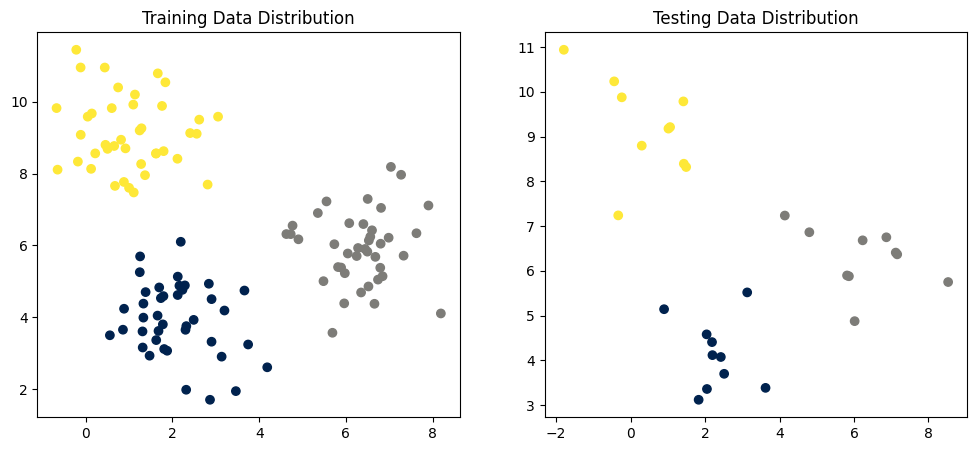

In [ ]:
# Import required modules
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define cluster centroids for generating synthetic points
cluster_points = [[2, 4], [6, 6], [1, 9]]
class_count = len(cluster_points)

# Generate artificial dataset with 150 samples around the given centers
features, target = make_blobs(n_samples=150,
                              centers=np.array(cluster_points),
                              random_state=1)

# Partition dataset: 80% training and 20% validation
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=8)

# Initialize a KNN classifier (default uses k=5 and Euclidean metric)
knn_model = KNeighborsClassifier()

# Fit the model using the training portion
knn_model.fit(X_train, y_train)

# Predict labels for both training and testing sets
train_preds = knn_model.predict(X_train)
test_preds = knn_model.predict(X_test)

# Compute prediction accuracy
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

# Create and visualize confusion matrix for the test data
cmatrix = confusion_matrix(y_test, test_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cmatrix,
                                    display_labels=knn_model.classes_)
cm_display.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix on Test Data")
plt.show()

# Plot training vs testing datasets
plt.figure(figsize=(12, 5))

# set up a figure with 1 row and 2 columns of plots
# this first one will go in the left spot
plt.subplot(1, 2, 1)

# scatter plot of the training set
# x values = first feature, y values = second feature
# color shows which class each point belongs to
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='cividis')
plt.title("Training Data Distribution")

# now place the second plot on the right side
plt.subplot(1, 2, 2)

# scatter plot of the testing set
# same idea as the training plot, but only using the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='cividis')
plt.title("Testing Data Distribution")

# finally show both plots together
plt.show()

